In [ ]:
print("Hello")

### GPT API를 활용해 질의/응답하기

- GPT API 페이지 : https://platform.openai.com/docs/api-reference/introduction

- 질의 응답 함수 API : https://platform.openai.com/docs/api-reference/chat/create

In [ ]:
# GPT API 모듈 설치하기

!pip install openai

In [ ]:
from openai import OpenAI   # GPT API 모듈 불러오기

client = OpenAI(api_key = "mEI2cheKqQRJZWlH9zEdT3BlbkFJRi7LLPPVkkEHNNST4UdJ")  # GPT API 키

In [ ]:
# 질문하기 : client.chat.completions.create(질문)
# 응답 : response에 저장

response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {"role": "system", "content": "너는 내가 궁금한 것을 30글자 이내로 알려줘야 해."},
    {"role": "user", "content": "오늘 공주 날씨는 어때?"}
  ]
)

> GPT에게 질문하기
> ```
> response = client.chat.completions.create(
>     model = "gpt-3.5-turbo",
>     messages = [{"role":"user", "content":"질문+a(프롬프트)"}],
>     n = 1,
>     max_tokens = 4000  # 최대 응답 길이
> )
```

> message 형식 :
> - 질문자(사용자) : [{"role": "user", "content": "질문"}]
> - 답변자(GPT)   : [{"role": "assistant", "content": "답변"}]

In [ ]:
print(response)
print(response.choices[0])
print(response.choices[0].message)

> GPT의 답변(response) 내용
> ```
> ChatCompletion(
>     id='chatcmpl-9UQ8JK0fHl1dtXXjVrtXrW5ACEaQl',
>     choices=[
>         Choice(
>             finish_reason='stop',
>             index=0,
>             logprobs=None,
>             message=ChatCompletionMessage(
>                 content='~~~응답1~~~',
>                 role='assistant',
>                 function_call=None,
>                 tool_calls=None
>             )
>         )
>     ],
>     created=1717037323,
>     model='gpt-3.5-turbo-0125',
>     object='chat.completion',
>     system_fingerprint=None,
>     usage=CompletionUsage(
>         completion_tokens=225,
>         prompt_tokens=33,
>         total_tokens=258
>     )
> )
```

In [ ]:
# 답변 텍스트만 추출하고 싶다면?

print(??????????????)

### GPT-3.5 Turbo 모델의 학습데이터는 2021년 기준

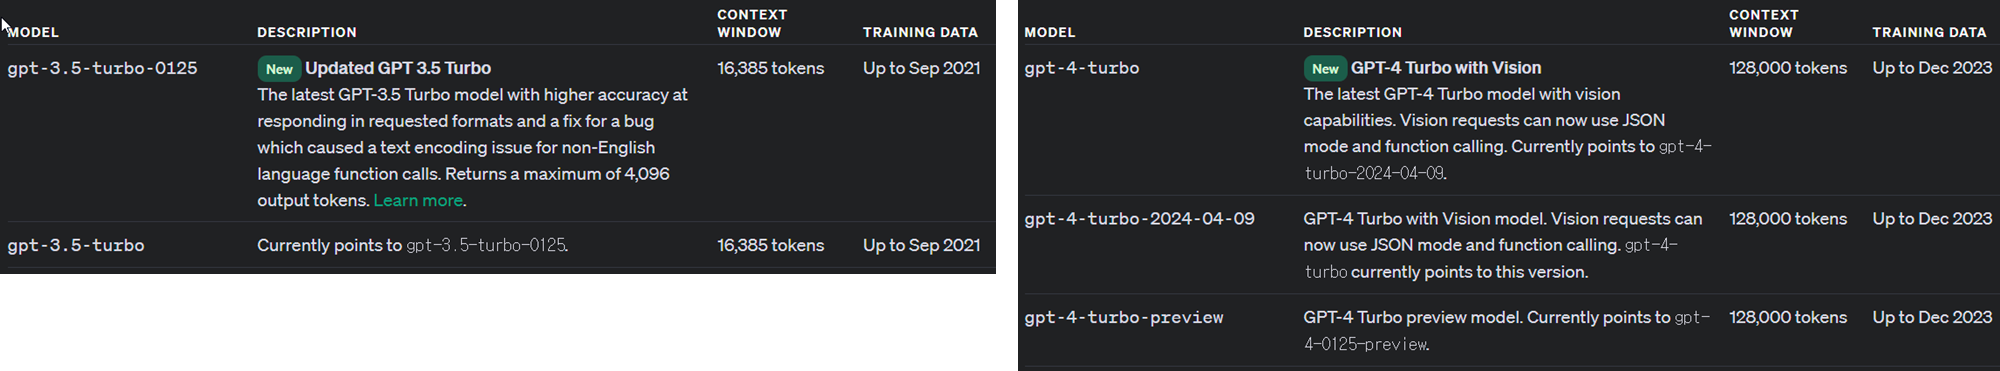

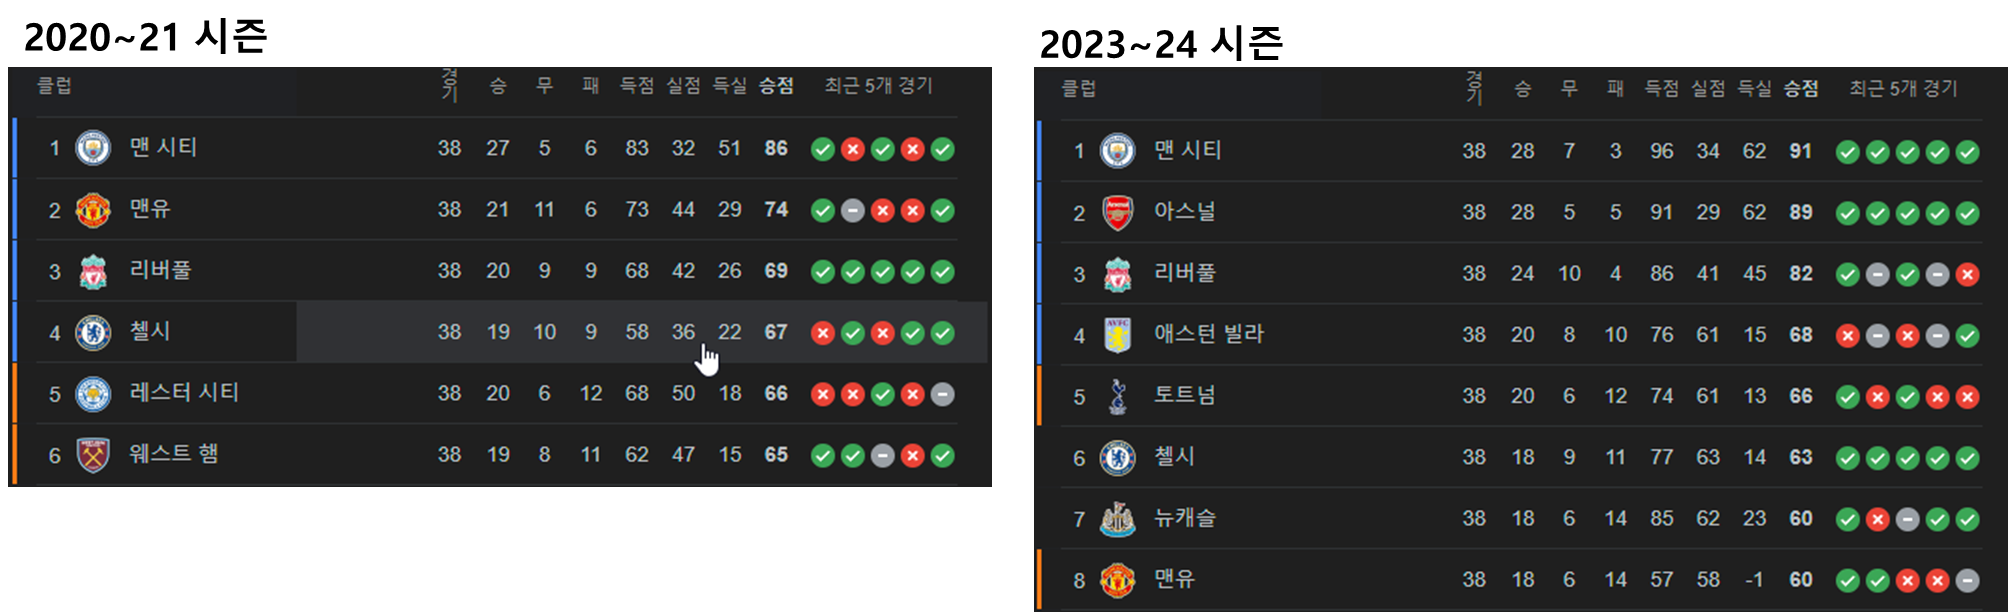

In [ ]:
# 학습되지 않은 데이터에 대한 질문

response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[{"role": "user", "content": "23-24 시즌 epl 1, 2, 3위 팀 알려줘."}],
)

print(response.choices[0].message.content)

In [ ]:
# 학습된 데이터에 대한 질문

response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[{"role": "user", "content": "20-21 시즌 epl 1, 2, 3위 팀 알려줘."}],
)

print(response.choices[0].message.content)

In [ ]:
# {"role": "system", "content": "너는 내가 궁금한 것을 30글자 이내로 알려줘야 해."}

# 문제1 : 질문을 입력받아 답변 얻어내기?

# 문제2 : 계속 티키타카 대화하기?

from openai import OpenAI   # GPT API 모듈 불러오기

client = OpenAI(api_key = "mEI2cheKqQRJZWlH9zEdT3BlbkFJRi7LLPPVkkEHNNST4UdJ")  # GPT API 키



response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    messages=[{"role": "user", "content": ?????}],
)



print(response.choices[0].message.content)

### 인공지능 스피커

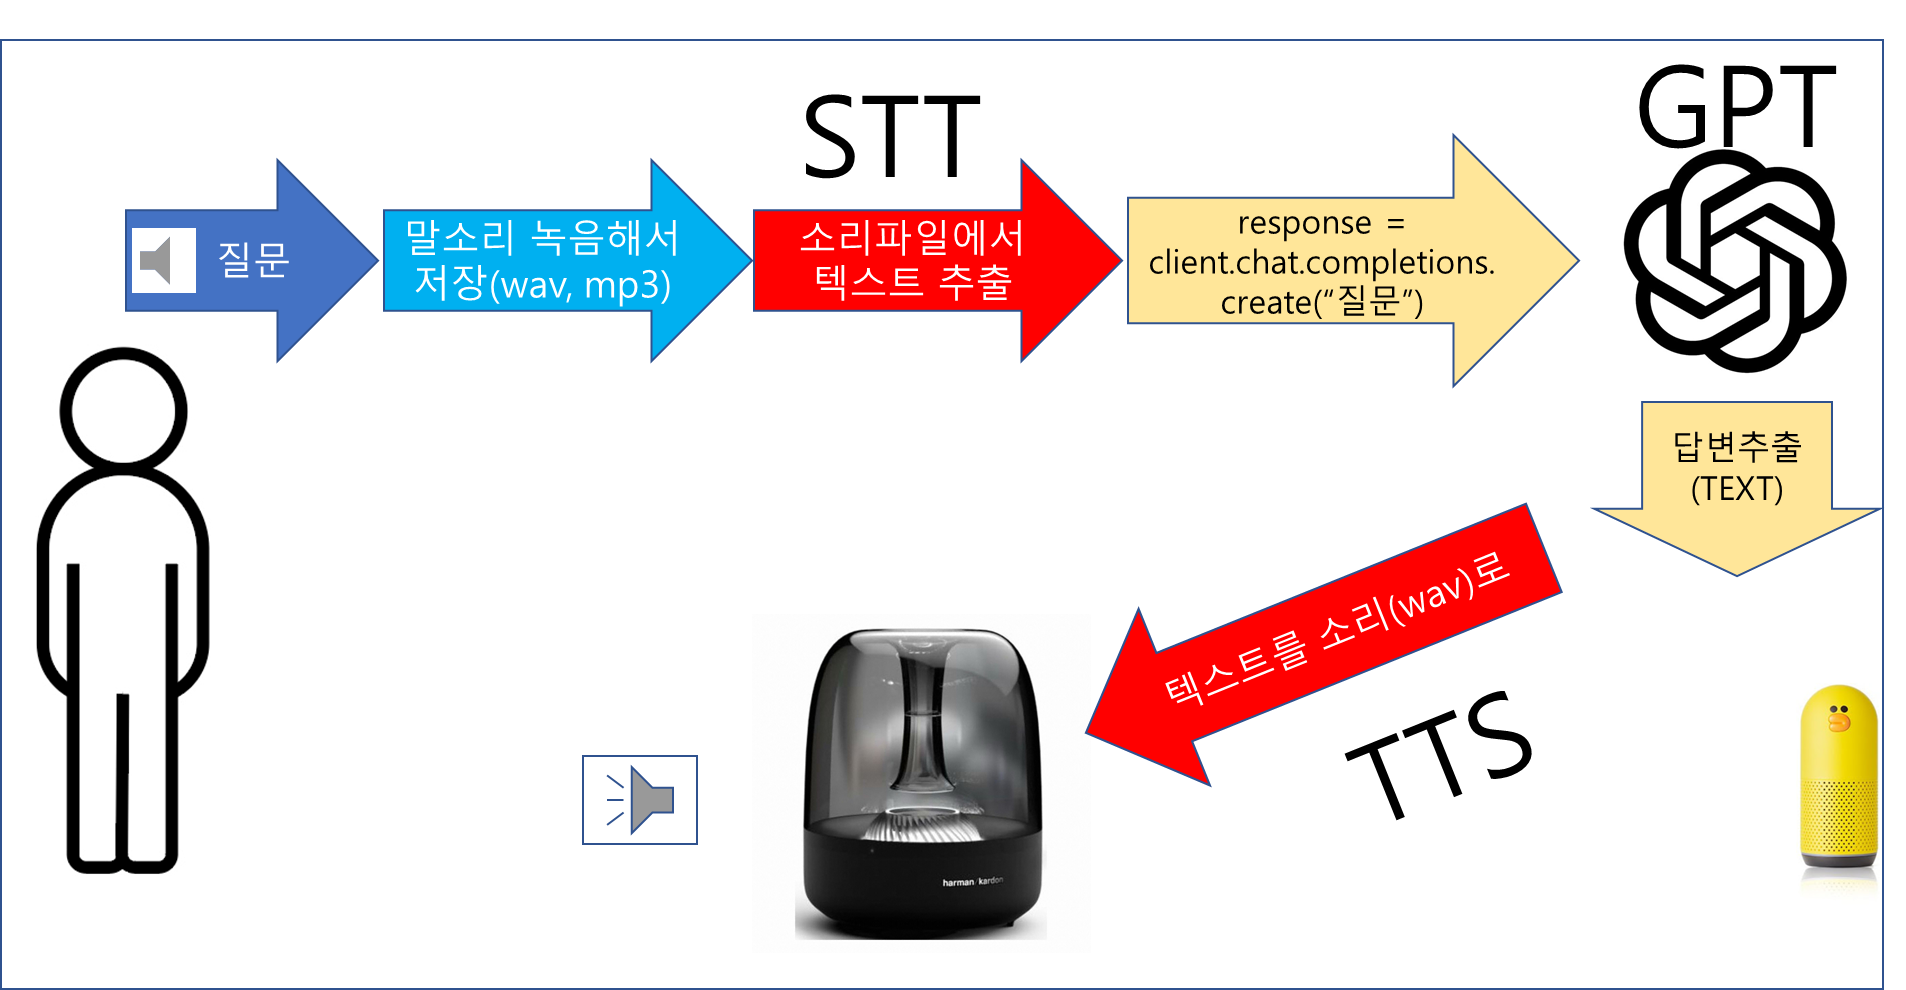

### TTS(Text to Speech) 모듈(라이브러리)

- 텍스트를 소리파일로 저장
- gTTS - 구글에서 개발하였으며, 무료로 사용할 수 있는 TTS 라이브러리

In [ ]:
!pip install gtts

In [ ]:
from gtts import gTTS

t2speech = gTTS(text="충남과학고 31기 김준섭입니다.", lang="ko")

t2speech.save("speech.mp3")

### STT(Speech to Text) 모듈(라이브러리)

- 음성을 텍스트로 변환
- Whisper - openai에서 개발하였으며, 유료 STT 라이브러리

In [ ]:
import openai

client = openai.OpenAI(api_key = "mEI2cheKqQRJZWlH9zEdT3BlbkFJRi7LLPPVkkEHNNST4UdJ")

speech = open("speech.mp3", "rb")

s2text = client.audio.transcriptions.create(model = "whisper-1", file = speech)

print(s2text.text)

### 소리 녹음하기

In [ ]:
!pip install pyaudio

In [ ]:
# 파이썬에서 오디오 장치 정보 얻어내기
import pyaudio

p = pyaudio.PyAudio()

for i in range(p.get_device_count()):
    info = p.get_device_info_by_index(i)
    print(f"Device {i}: {info['name']}")

p.terminate()

In [ ]:
# 관련 모듈(라이브러리) 설치하기

pip install numpy sounddevice wavio

In [ ]:
# 소리로 저장하기
import numpy as np
import sounddevice as sd
import wavio

input_device = 1
duration = 5 # 5초
sample_rate = 16000

print("Recording...")
# 소리 녹음하여 저장
recording = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=2, dtype='int16', device=input_device)
sd.wait()
wavio.write("recording.wav", recording, sample_rate, sampwidth=2)

print("Recording finished.")